## 1. Data Loading

We begin by importing the dataset using pandas. We'll explore the structure of the data, the types of variables it contains, and check for any missing values or data quality issues.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("../data/Mall_Customers.csv")

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 2. Univariate Analysis

We now visualize the distribution of each individual feature. This helps us understand the spread of categorical and numerical data, and detect any skewness or outliers in the dataset.


### Gender Distribution

The bar chart shows the gender distribution of customers. There are slightly more female customers than male customers in the dataset. This imbalance may have implications for marketing strategies or product targeting based on gender.


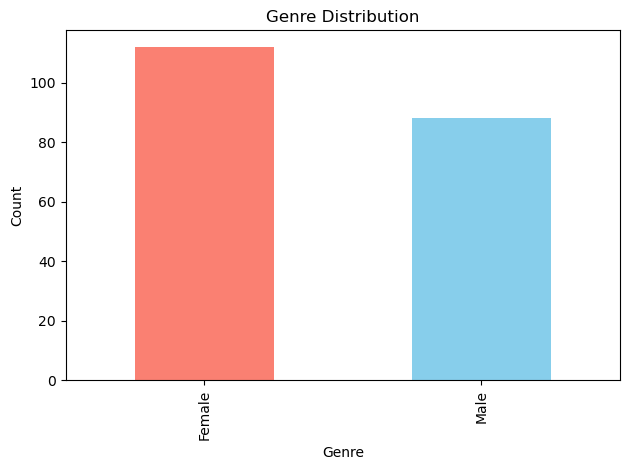

In [25]:
df['Genre'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../images/genre_distribution.png")
plt.show()

### Age Distribution

The histogram illustrates the distribution of customer ages. Most customers are between the ages of 20 and 40, with a particularly high concentration around the 30-year mark. There is a gradual decline in the number of customers as age increases beyond 40, suggesting that the target audience for this business tends to be younger individuals.


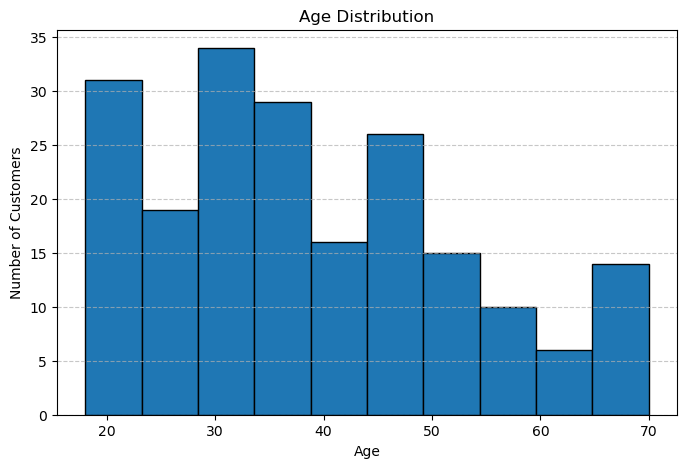

In [33]:
plt.figure(figsize=(8, 5))
plt.hist(df["Age"], bins=10, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../images/age_distribution')
plt.show()

### Annual Income Distribution

The histogram below shows the distribution of customers' annual incomes. The majority of customers fall within the $40k–$80k range, with a notable peak around $75k. There are fewer customers with incomes above $100k, suggesting a right-skewed distribution. This information is useful in identifying income-based customer segments.


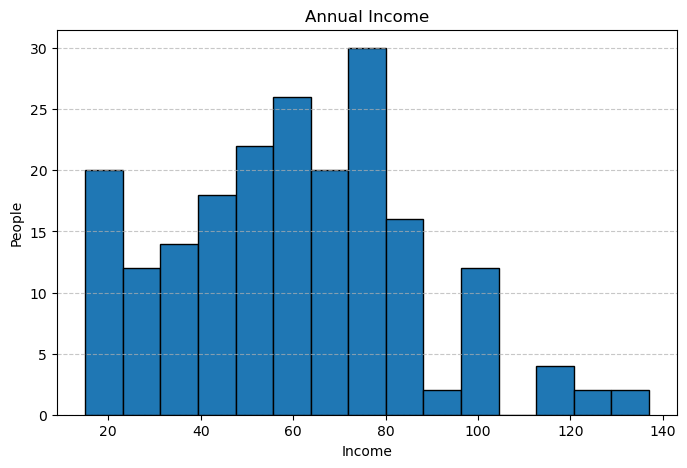

In [49]:
plt.figure(figsize=(8,5))
plt.hist(df["Annual Income (k$)"], bins=15, edgecolor="black")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("People")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../images/income_distribution')
plt.show()

### Spending Score Distribution

The histogram below shows the distribution of customers' spending scores. The distribution is fairly spread out across the range, with visible peaks around scores of 50 and 75. This indicates that customers are grouped in both moderate and high spending categories. Interestingly, there is also a noticeable presence of low spenders, suggesting a diverse customer base with varying spending behaviors.


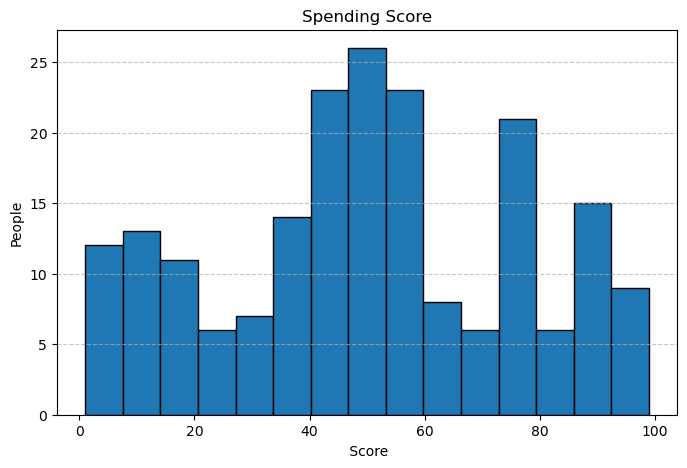

In [62]:
plt.figure(figsize=(8,5))
plt.hist(df["Spending Score (1-100)"], bins=15, edgecolor="black")
plt.title("Spending Score")
plt.xlabel(" Score")
plt.ylabel("People")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../images/spending_score_distribution')
plt.show()

## 3. Bivariate Analysis

In this section, we examine the relationships between pairs of numerical variables. These visualizations help us identify patterns and clusters that might not be visible from univariate analysis alone.


### Age vs. Spending Score (Colored by Age)

The scatter plot below visualizes the relationship between customer age and spending score, with point colors indicating age intensity. We observe that younger customers exhibit a wide range of spending behavior, while middle-aged customers tend to cluster around moderate spending. Older customers generally show lower spending scores, indicating possible age-related behavioral trends in purchasing.


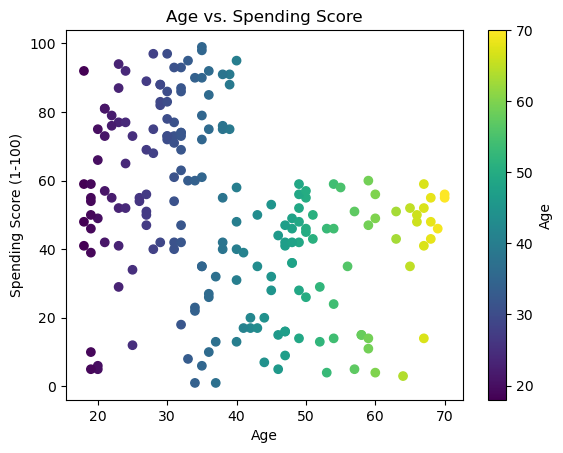

In [103]:
plt.scatter(df["Age"], df["Spending Score (1-100)"], c=df["Age"], cmap="viridis")
plt.title("Age vs. Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.colorbar(label="Age")
plt.savefig('../images/relation_between_age_and_spending_score')
plt.show()

### Annual Income vs. Spending Score (Colored by Income)

This scatter plot visualizes the relationship between annual income and spending score. Several distinct clusters are visually evident. There appear to be customers with high spending scores but low income, as well as those with high income but low spending scores. A dense concentration in the middle represents average income and average spending customers. These visually separable groups suggest that clustering algorithms may be highly effective in identifying distinct customer segments.


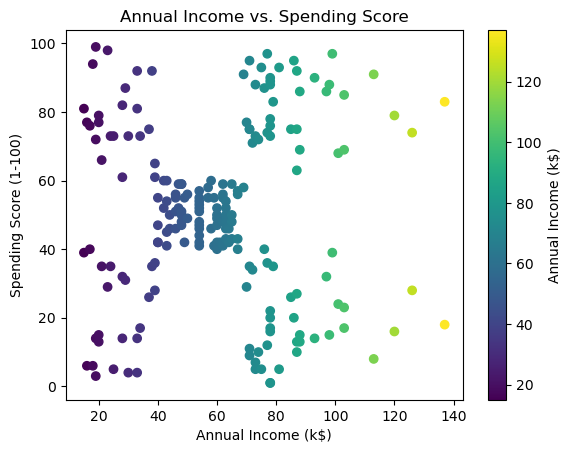

In [108]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Annual Income (k$)"], cmap="viridis")
plt.title("Annual Income vs. Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.colorbar(label="Annual Income (k$)")
plt.savefig('../images/relation_between_annual_income_and_spending_score')
plt.show()

### Annual Income vs. Age (Colored by Income)

The scatter plot below shows the relationship between customer age and annual income. Each point is colored based on income level. We observe that while high-income individuals tend to fall within the 30–60 age range, income levels are otherwise spread out across different age groups. This suggests that age is not a strong standalone predictor of income in this dataset, but certain clusters may still exist, particularly around middle-aged customers with medium to high income.


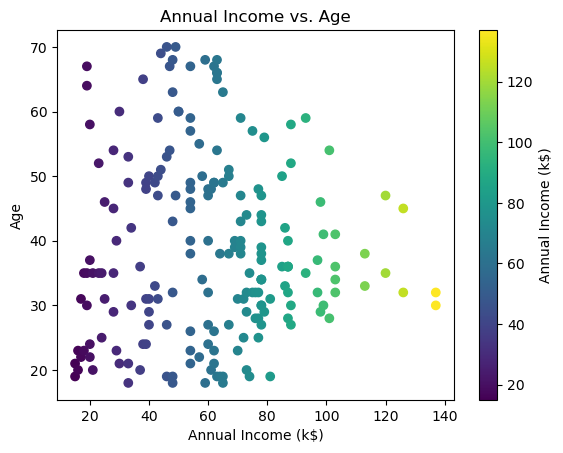

In [118]:
plt.scatter(df["Annual Income (k$)"], df["Age"], c=df["Annual Income (k$)"], cmap="viridis")
plt.title("Annual Income vs. Age")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Age")
plt.colorbar(label="Annual Income (k$)")
plt.savefig("../images/relation_between_age_and_annual_Income")
plt.show()

## 4. Summary & Next Steps

In this notebook, we performed a comprehensive exploratory data analysis (EDA) of the customer dataset. We analyzed the distribution of individual features, visualized relationships between key variables, and identified potential clusters visually.

In the next notebook, we will apply unsupervised machine learning techniques (KMeans clustering) to segment customers based on their behaviors and characteristics.
